# CBN roster report 2017-18

Reports on CBN roster, with special interest to the completedness/progress of School rosters collection and Candian player detection.

## CBN roster
We track/collect players listed on the CBN Letter of Intent (LOI) web page and the Canadians in College (CIC) web pages.  The players on these two CBN web pages get merged into one CBN roster. 

## School rosters
We track/collect the school rosters of over 1500 schools.  Schools publish their Spring baseball rosters betweeen July through Feb.  Each week we 'poll' the schools web site to see if their Spring roster is available. The Schools rosters are used to detect Canadian players (in the hometown field).

## New players detected
We compare the detected Canadian players in the School rosters with the players in the CBN roster.  Any Canadian players in the School roster not in the CBN roster is report to CBN so they may add it to there CIC web page.


# Report methodology

1. First we report on the CBN roster, showing total players and schools.  We verify that all schools in the CBN roster are 'known' to school rosters.

2. Next, we report on the status of school roster collections, showing the count of total 'known' schools and the count of school rosters collected.  We also show the schools with Canadian players and the total number of Canadian players detected

3. Then we classify every CBN player as one of: school_roster_not_collected_yet, player_found, player_not_found. 

4. The we identify any players from the school roster with Canadian hometowns that are not in the CBN roster.  These players are trasmitted (via email) to CBN so they may add them to CIC web page.

In [1]:
import CBN_roster_report_2018
%matplotlib inline

DATA_MODULE_YEAR = '2018'   # The top level data directory identifier
PSETNAME =  "CBN 2018"      # The identifier for the CBN roster
PLAYING_SEASON = '2018'     # The Spring 2017-18 identifier, for school rosters

report_obj = CBN_roster_report_2018.CBN_roster_report(DATA_MODULE_YEAR, PSETNAME, PLAYING_SEASON)

# 1 CBN roster

## 1.1 CBN roster description

In [2]:
report_obj.print_cbn_roster_desc()

Using CBN rosters created 2017-08-07 15:48:12.697207
903 players attending 373 schools

The players come from these CBN pages and edition dates
CIC web page 2017-08-03    741
LOI web page 2017-08-02    162
Name: CBN_SOURCE, dtype: int64

Note: some players appear on both the CIC web page and the LOI web page.
This happens when a player switches schools.
For players that appear on both LOI and CIC web pages, the LOI information is used.
This will cause the CIC player count to be lower than actual number of players on CIC web page


## 1.2 Compare CBN schools with all known schools

schoolcontrol.SchoolControl has 1596 schools
Canadians play in 373 schools of the 1596 known schools (23.4%)


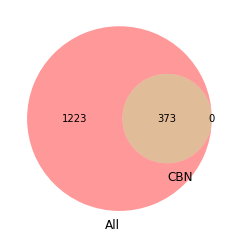

In [3]:
report_obj.compare_cbn_all_schools()

## 1.3 Compare CBN schools with collected schools

In [4]:
report_obj.compare_cbn_collected_schools()

GOOD: All schools in CBN rosters are known to Schools module


# Report on how many CBN schools collected/not collected

# Schools venn diagram

Provides a lot of useful information on the progress of the collection.

## Three main circles
There are three main circles, All, Collected and CBN.   The school count for each group is shown in their title.
We see that CBN and Collected schools are both contained within All schools, which is good and tells us the school data is consistent.
1. All Schools, the red circle
2. Collected schools , the brown circle
3. CBN schools, the purple circle


## CBN circle (purple)
The CBN circle sits entirely within the All schools circle (good).  Further the CBN circle intersects with the collected schools circle.  The intersection area (greyish) shows the count of schools that are in CBN and have been collected.  The count of schools that are in CBN but NOT collected is shown in the purple area.


## Collected circle (brown)
The collected circle also sits entirely within the All schools circle (good).  Further, the collected circle intersects with the CBN cirlce .  The intersection area (greyish) shows the cound of schools that have been collected and are in the CBN schools.  The count of schools whose rosters have been collected that are not in CBN is shown in the brown area.

## All circle (red)
The red circle contains both the CBN and collected cirle and represents all known schools.  The count of schools that have not been collected AND do not belong to CBN schools is shown in red.  These schools present the opportunitity to discover new Canadian players (as their school rosters are collected).

In the CBN title we see the count of all CBN schools. We see that the whole CBN circle is contained within All schools.  This is good, it tells us our school data is consistent.   Further we can see count of CBN schools that have been collected in the interesection with the collected schools circle.  And we can see the count of schools in CBN that have not yet been collected.



1. Looking at the CBN schools (the purple circle), of the 373 schools, 326 schools have not been collected and 47 have been collected.
2. Looking at the Collected rosters (the brown circle), 166 schools collected fo not belong to CBN, but 47 do.
3. The large red cirle shows 1058 are schools that do not belong to CBN and have not been collected yet.  This is the opportunity to find new Canadians.

Schools rosters file date: 2017-08-11 05:25:07.707283
Schools rosters collected: 225 schools with 6538 players
CBN schools collected/not collected/total: 51/322/373 (13.7%)


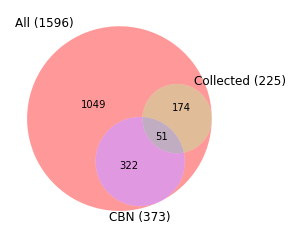

In [5]:
report_obj.report_collected_not_collected()

## Classify the players as:
1. school_not_collected
2. player_found
3. player_NF

You know this has already been done when we created the CBN, so our work here is simply
using the data in the cbn file.
In fact, we could do the above test of collected/not collected without consulting the schools rosters ... but let's consult as a means to detect other types of errors is numbers do not line up exactly.




In [6]:
report_obj.classify_cbn_players()

school_not_collected    783
player_found             77
player_NF                43
Name: report_classification, dtype: int64
...Writing school_not_collected players to cbn_school_not_collected.csv
...Writing player_found players to cbn_player_found.csv
...Writing player_NF players to cbn_player_NF.csv


 *** PLAYERS in CBN that are not found on school 2018 roster....
Benedictine College, Reid Fritzke, http://www.ravenathletics.com/roster/21/3.php
Benedictine College, Brody Burnett, http://www.ravenathletics.com/roster/21/3.php
Briar Cliff University, J.P. Martin, http://www.bcuchargers.com/roster/16/1.php
Campbellsville University, Zach Lampreia, http://www.campbellsvilletigers.com/roster.aspx?path=baseball&roster=747
Concordia University Ann Arbor, Abdallah Salman, http://www.concordiacardinals.com/roster/20/6.php
Culver-Stockton College, Matt Blair-Brown, http://www.cscwildcats.com/roster/21/3.php
Culver-Stockton College, Nathan Halliday, http://www.cscwildcats.com/roster/21/3.php
G

# Candians in Collected rosters but not in CBN rosters


In [7]:
report_obj.cdn_not_in_cbn()

89 Canadians detected in collected schools roster
12 canadian(s) not in CBN roster
...Writing notin_df.csv

 New players...
University of Pikeville, Brendan Halstrom, British Columbia, Canada, http://upikebears.com/roster.aspx?path=baseball&roster=197
University of Pikeville, Luke Lubiniecki, Regina Saskatchewan, Canada, http://upikebears.com/roster.aspx?path=baseball&roster=197
Colorado Mesa University, Andrew Malone, Calgary, Alberta, http://cmumavericks.com/roster.aspx?path=baseball&roster=134
Colorado Mesa University, Dustin Robirtis, Victoria, B.C., http://cmumavericks.com/roster.aspx?path=baseball&roster=134
Cloud County Community College, Aidan Huggins, Edmonton, Alberta Canada, http://www.cloudtbirds.com/sports/bsb/2017-18/roster
Cloud County Community College, Cole Jackson, Thorsby, Alberta Canada, http://www.cloudtbirds.com/sports/bsb/2017-18/roster
Cloud County Community College, Corben Peters, Ottawa, Ontario Canada, http://www.cloudtbirds.com/sports/bsb/2017-18/roster
Clou